# **Machine Learning Models for predicting X --> y using the data in "data.parquet"**

In [15]:
## Installing pandas-profiling
%pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

%pip install xgboost

%pip install pyarrow


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 19.6/19.6 MB 5.8 MB/s eta 0:00:00



In [42]:
# Import important libraries
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot

import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import r2_score
import pickle

# **Lets load the Dataset**

In [16]:
# Read parquet as a dataframe
df = pd.read_parquet("C:/Users/dek/Downloads/IfTA_Programming_task\LR_SVR_XGBoostRegressore_RandomForestRegressor_ML_Models/data.parquet")
df

x_0        x_1       x_2       x_3       x_4        x_5  \
0.0   -2.509198  -6.589518  6.574750  1.225544 -5.441297  -5.158895   
0.1   -1.808076  -5.784906  7.091301  1.977199 -4.726164  -4.434952   
0.2   -1.107714  -4.981646  7.607356  2.728112 -4.012037  -3.711820   
0.3   -0.408874  -4.181087  8.122422  3.477542 -3.299921  -2.990308   
0.4    0.287688  -3.384572  8.636006  4.224751 -2.590815  -2.271221   
...         ...        ...       ...       ...       ...        ...   
999.5 -9.945182 -18.004796  1.004384  2.775047 -8.882149 -16.591064   
999.6 -9.806384 -18.263131  0.952351  2.873734 -8.959679 -16.246443   
999.7 -9.661605 -18.501171  0.901751  2.958782 -9.021376 -15.893401   
999.8 -9.511100 -18.718362       NaN  3.030186 -9.067106 -15.532386   
999.9 -9.355133 -18.914192  0.804813  3.087963 -9.096769 -15.163854   

             x_6       x_7        x_8       x_9             y  
0.0     6.344444  4.929828   9.272400  5.915853     -7.994212  
0.1     6.909614  5.864192  10.527455  6.512394    -20.191479  
0.2     7.474196  6.797094  11.781020  7.108557  19593.971202  
0.3     8.037604  7.727074  13.031605  7.703966    -44.536840  
0.4     8.599253  8.652678  14.277727  8.298245    -56.660408  
...          ...       ...        ...       ...           ...  
999.5  19.531087 -1.838259   6.274251  5.944000  19531.215712  
999.6        NaN -1.933909   6.409335  5.990310     83.270886  
999.7  19.275463 -2.022577   6.539114  6.040492     81.117769  
999.8  19.132969 -2.103938   6.663271  6.094601     78.993306  
999.9  18.981028 -2.177673   6.781502  6.152685     76.899914  

[10000 rows x 11 columns]

In [17]:
# Information regarding the database
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10000 entries, 0.0 to 999.9000000000001
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     9500 non-null   float64
 1   x_1     9500 non-null   float64
 2   x_2     9500 non-null   float64
 3   x_3     9500 non-null   float64
 4   x_4     9500 non-null   float64
 5   x_5     9500 non-null   float64
 6   x_6     9500 non-null   float64
 7   x_7     9500 non-null   float64
 8   x_8     9500 non-null   float64
 9   x_9     9500 non-null   float64
 10  y       10000 non-null  float64
dtypes: float64(11)
memory usage: 937.5 KB


In [18]:
## Check the missing values in the original data
df.isnull().sum()

x_0    500
x_1    500
x_2    500
x_3    500
x_4    500
x_5    500
x_6    500
x_7    500
x_8    500
x_9    500
y        0
dtype: int64

In [19]:
## Check the unique of the orginal data
df.nunique()

x_0     9500
x_1     9500
x_2     9500
x_3     9500
x_4     9500
x_5     9500
x_6     9500
x_7     9500
x_8     9500
x_9     9500
y      10000
dtype: int64

In [20]:
## Create pandas profiling report in html format

#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("/content/your_report.html")

In [21]:
## Remove duplicates
df = df.drop_duplicates(keep='first')
df.shape

(10000, 11)


- There are no duplicates as the size of dataset is same after removing duplicate rows

# **Exploratory Data Analysis**

- **Check and fill missing values**

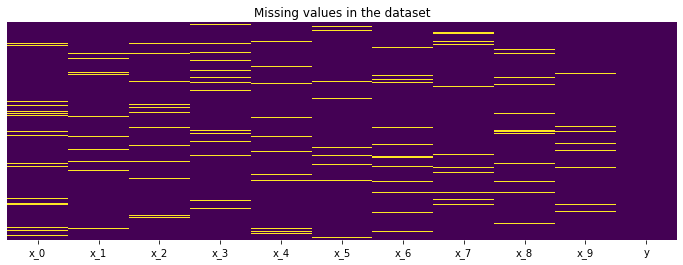

In [22]:
# Visualizing map for missing values
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values in the dataset');

In [23]:
## Summarizing the Statistics of the original data
df.describe()

x_0          x_1          x_2          x_3          x_4  \
count  9500.000000  9500.000000  9500.000000  9500.000000  9500.000000   
mean     -2.426686    -6.497493     6.690429     1.327393    -5.362143   
std       6.024108     6.636835     5.812503     8.058859     6.395254   
min     -16.699935   -25.306047   -11.529512   -17.748885   -22.326708   
25%      -6.690738   -10.860517     2.462572    -3.952630    -9.981385   
50%      -2.279209    -6.697979     6.927207     1.441649    -5.635869   
75%       1.666959    -2.084193    10.620475     6.675253    -1.073252   
max      18.922192    13.435673    23.859091    25.803378    14.073480   

               x_5          x_6          x_7          x_8          x_9  \
count  9500.000000  9500.000000  9500.000000  9500.000000  9500.000000   
mean     -5.056841     6.465323     5.001474     9.396949     6.066720   
std       6.669856     6.111031     6.796512    10.350588     6.706510   
min     -24.372181   -11.081802   -15.776908   -14.190917   -12.343675   
25%      -9.175233     1.931674     0.395510     2.058613     1.599810   
50%      -4.874212     6.640814     4.675923     8.974248     5.871135   
75%      -0.661256    10.505963     9.518025    16.850463    10.351639   
max      16.950776    24.634488    28.871298    46.117738    30.262451   

                  y  
count  10000.000000  
mean     965.396323  
std     4252.239064  
min     -402.558358  
25%      -57.370881  
50%       -6.502222  
75%       51.603811  
max    19995.778237

In [24]:
# Fill nan values with mean values of every column
df = df.fillna(value=df.mean())

In [25]:
# Check missing values
df.isna().sum()

x_0    0
x_1    0
x_2    0
x_3    0
x_4    0
x_5    0
x_6    0
x_7    0
x_8    0
x_9    0
y      0
dtype: int64

- **Check and remove outliers**

Using box plot to check the ouliers.

**Box plot** - The five-number summary of a piece of data is shown in a box plot. The minimum, first quartile, median, third quartile, and maximum make up the five-number summary.
A box is drawn from the first quartile to the third quartile in a box plot. At the median, a vertical line passes through the box. Each quartile's whiskers lead to the minimum or maximum.
The interquartile range (IQR) is the box plot showing the middle 50% of scores and can be calculated by subtracting the lower quartile from the upper quartile (e.g. Q3−Q1).

Using IQR to remove outliers.

**IQR** - Find the median (middle value) of the lower half and upper half of the data before calculating the interquartile range (IQR). Quartile 1 (Q1) and Quartile 3 are these values (Q3). The IQR represents the variation between Q3 and Q1.

<AxesSubplot:>

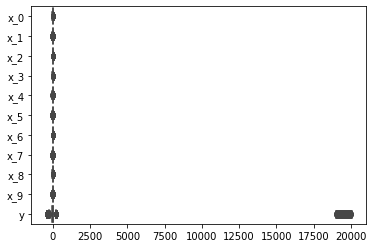

In [26]:
## Check the outliers using box plot
sns.boxplot(data=df,  orient="h")

In [27]:
# There is high range difference fo y so we will plot different box plots for all x features and y
# For this, we take all the x features and y in different dataframes
X = df.drop(columns=['y'])
y = df['y']

<AxesSubplot:>

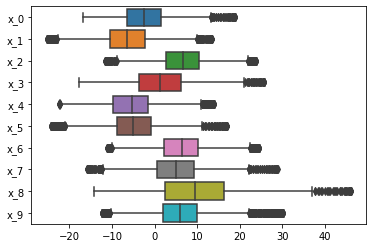

In [28]:
# Box plot for all the x features
sns.boxplot(data=X,  orient="h")

<AxesSubplot:>

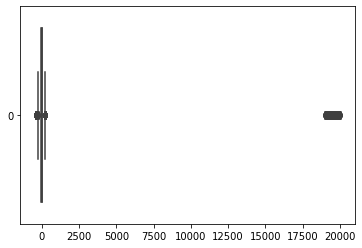

In [29]:
# Box plot for only y
sns.boxplot(data=y,  orient="h")

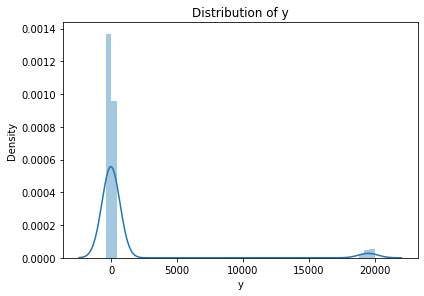

In [30]:
# y distribution plot
sns.distplot(df['y'])  # checked distribution for df['x_0'], df['x_1'], df['x_2'],df['x_3'], df['x_4'], df['x_5'], df['x_6'], df['x_7'], df['x_8'], and df['x_9']
plt.tight_layout()
plt.title("Distribution of y")
plt.show()

- We observed too many outliers in every x features and y

In [31]:
## Create a function to Remove oultiers from the dataset using IQR

def remove_outliers(df):
  """
  This function removes oultiers from the dataset using IQR
  """
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

  return df_out

df_out = remove_outliers(df)

In [32]:
df_out

x_0        x_1       x_2       x_3       x_4        x_5  \
0.0    -2.509198  -6.589518  6.574750  1.225544 -5.441297  -5.158895   
0.1    -1.808076  -5.784906  7.091301  1.977199 -4.726164  -4.434952   
0.3    -0.408874  -4.181087  8.122422  3.477542 -3.299921  -2.990308   
0.4     0.287688  -3.384572  8.636006  4.224751 -2.590815  -2.271221   
0.5     0.981215  -2.593435  9.147617  4.969002 -1.885715  -1.555365   
...          ...        ...       ...       ...       ...        ...   
999.4 -10.077748 -17.726763  1.057857  2.662748 -8.788953 -16.926834   
999.6  -9.806384 -18.263131  0.952351  2.873734 -8.959679 -16.246443   
999.7  -9.661605 -18.501171  0.901751  2.958782 -9.021376 -15.893401   
999.8  -9.511100 -18.718362  6.690429  3.030186 -9.067106 -15.532386   
999.9  -9.355133 -18.914192  0.804813  3.087963 -9.096769 -15.163854   

             x_6       x_7        x_8       x_9          y  
0.0     6.344444  4.929828   9.272400  5.915853  -7.994212  
0.1     6.909614  5.864192  10.527455  6.512394 -20.191479  
0.3     8.037604  7.727074  13.031605  7.703966 -44.536840  
0.4     8.599253  8.652678  14.277727  8.298245 -56.660408  
0.5     9.158561  9.572461  15.517906  8.891019 -68.734956  
...          ...       ...        ...       ...        ...  
999.4  19.643748 -1.735963   6.134194  5.901505  87.653135  
999.6   6.465323 -1.933909   6.409335  5.990310  83.270886  
999.7  19.275463 -2.022577   6.539114  6.040492  81.117769  
999.8  19.132969 -2.103938   6.663271  6.094601  78.993306  
999.9  18.981028 -2.177673   6.781502  6.152685  76.899914  

[8836 rows x 11 columns]

**Check box plot after removing outliers from the dataset**

In [33]:
# To plot box plot, we take all the x features and y in different dataframes
x_out = df_out.drop(columns=['y'])
y_out = df_out['y']

<AxesSubplot:>

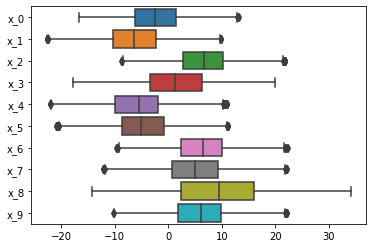

In [34]:
# Box plot for all x features after removing outliers from the dataset
sns.boxplot(data=x_out,  orient="h")

<AxesSubplot:>

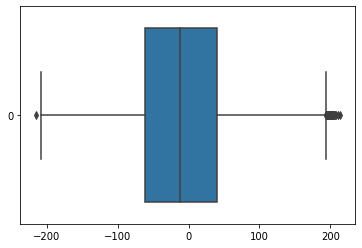

In [35]:
# Box plot for only y after removing outliers from the dataset
sns.boxplot(data=y_out,  orient="h")

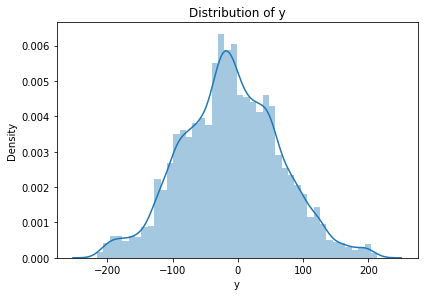

In [36]:
# y distribution plot after removing outliers from the dataset
sns.distplot(df_out['y'])  # checked distribution for df_out['x_0'], df_out['x_1'], df_out['x_2'], df_out['x_3'], df_out['x_4'], df_out['x_5'], df_out['x_6'], df_out['x_7'], df_out['x_8'], and df_out['x_9']
plt.tight_layout()
plt.title("Distribution of y")
plt.show()


- We observed that many outliers are removed in every x features and y

In [37]:
df_out.describe()

x_0          x_1          x_2          x_3          x_4  \
count  8836.000000  8836.000000  8836.000000  8836.000000  8836.000000   
mean     -2.463541    -6.481188     6.604485     1.336873    -5.693816   
std       5.607827     6.218692     5.399605     7.719171     6.000916   
min     -16.699935   -22.722466    -8.787272   -17.748885   -22.163336   
25%      -6.265440   -10.355595     2.779922    -3.448993    -9.886343   
50%      -2.426686    -6.497493     6.690429     1.327393    -5.502076   
75%       1.380529    -2.312241    10.246481     6.235728    -1.837223   
max      13.153490     9.885267    21.852110    19.996881    10.963887   

               x_5          x_6          x_7          x_8          x_9  \
count  8836.000000  8836.000000  8836.000000  8836.000000  8836.000000   
mean     -4.871380     6.328290     4.925847     9.133840     5.795719   
std       6.023640     5.596343     6.294393     9.837625     5.933454   
min     -20.946988    -9.697829   -12.149641   -14.190917   -10.259700   
25%      -8.655702     2.302920     0.770330     2.302651     1.847091   
50%      -5.056841     6.465323     5.001474     9.396949     6.066720   
75%      -0.797930    10.078743     9.190272    16.090013     9.835833   
max      11.145448    22.298061    22.136150    34.132629    22.189137   

                 y  
count  8836.000000  
mean    -10.581532  
std      75.087382  
min    -215.887790  
25%     -61.389881  
50%     -12.062544  
75%      40.669496  
max     213.711774

In [38]:
## To remove negative values from the dataset, we are shifting our dataset upwards on the basis of least minimum value in the dataset which is -215.887790, we are adding this value in our dataset
df_out = df_out + 215.887790

In [39]:
df_out.describe()

x_0          x_1          x_2          x_3          x_4  \
count  8836.000000  8836.000000  8836.000000  8836.000000  8836.000000   
mean    213.424249   209.406602   222.492275   217.224663   210.193974   
std       5.607827     6.218692     5.399605     7.719171     6.000916   
min     199.187855   193.165324   207.100518   198.138905   193.724454   
25%     209.622350   205.532195   218.667712   212.438797   206.001447   
50%     213.461104   209.390297   222.578219   217.215183   210.385714   
75%     217.268319   213.575549   226.134271   222.123518   214.050567   
max     229.041280   225.773057   237.739900   235.884671   226.851677   

               x_5          x_6          x_7          x_8          x_9  \
count  8836.000000  8836.000000  8836.000000  8836.000000  8836.000000   
mean    211.016410   222.216080   220.813637   225.021630   221.683509   
std       6.023640     5.596343     6.294393     9.837625     5.933454   
min     194.940802   206.189961   203.738149   201.696873   205.628090   
25%     207.232088   218.190710   216.658120   218.190441   217.734881   
50%     210.830949   222.353113   220.889264   225.284739   221.954510   
75%     215.089860   225.966533   225.078062   231.977803   225.723623   
max     227.033238   238.185851   238.023940   250.020419   238.076927   

                  y  
count  8.836000e+03  
mean   2.053063e+02  
std    7.508738e+01  
min    4.633198e-07  
25%    1.544979e+02  
50%    2.038252e+02  
75%    2.565573e+02  
max    4.295996e+02

**Analyzing the Correlated Features**

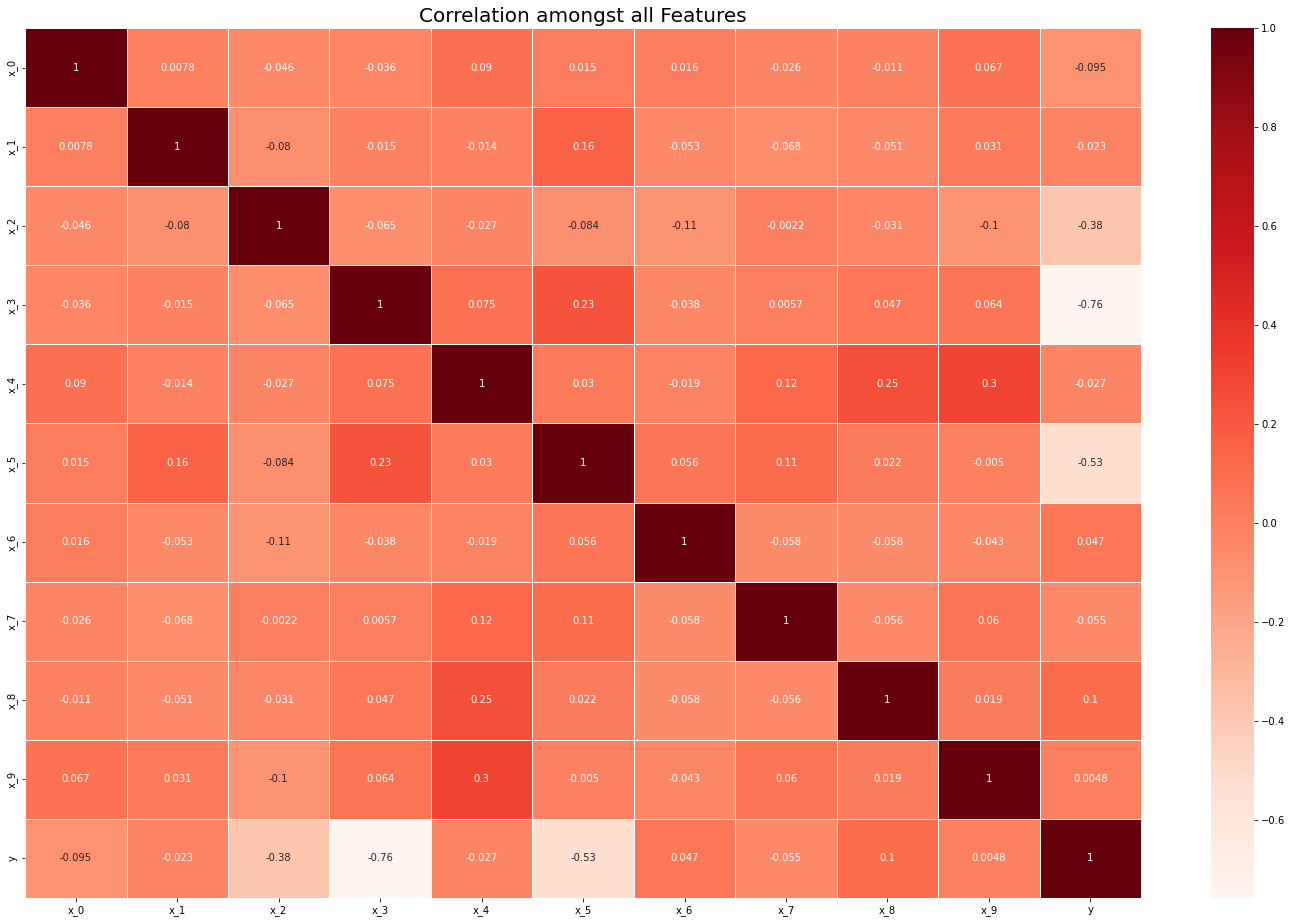

In [40]:
# Correlation Map of all the features in the dataset

plt.rcParams['figure.figsize']=(25,16)
heatmap=sns.heatmap(df_out.corr(), annot = True, linewidths=.5, cmap='Reds')
heatmap.set_title(label='Correlation amongst all Features', fontsize=20)
heatmap;

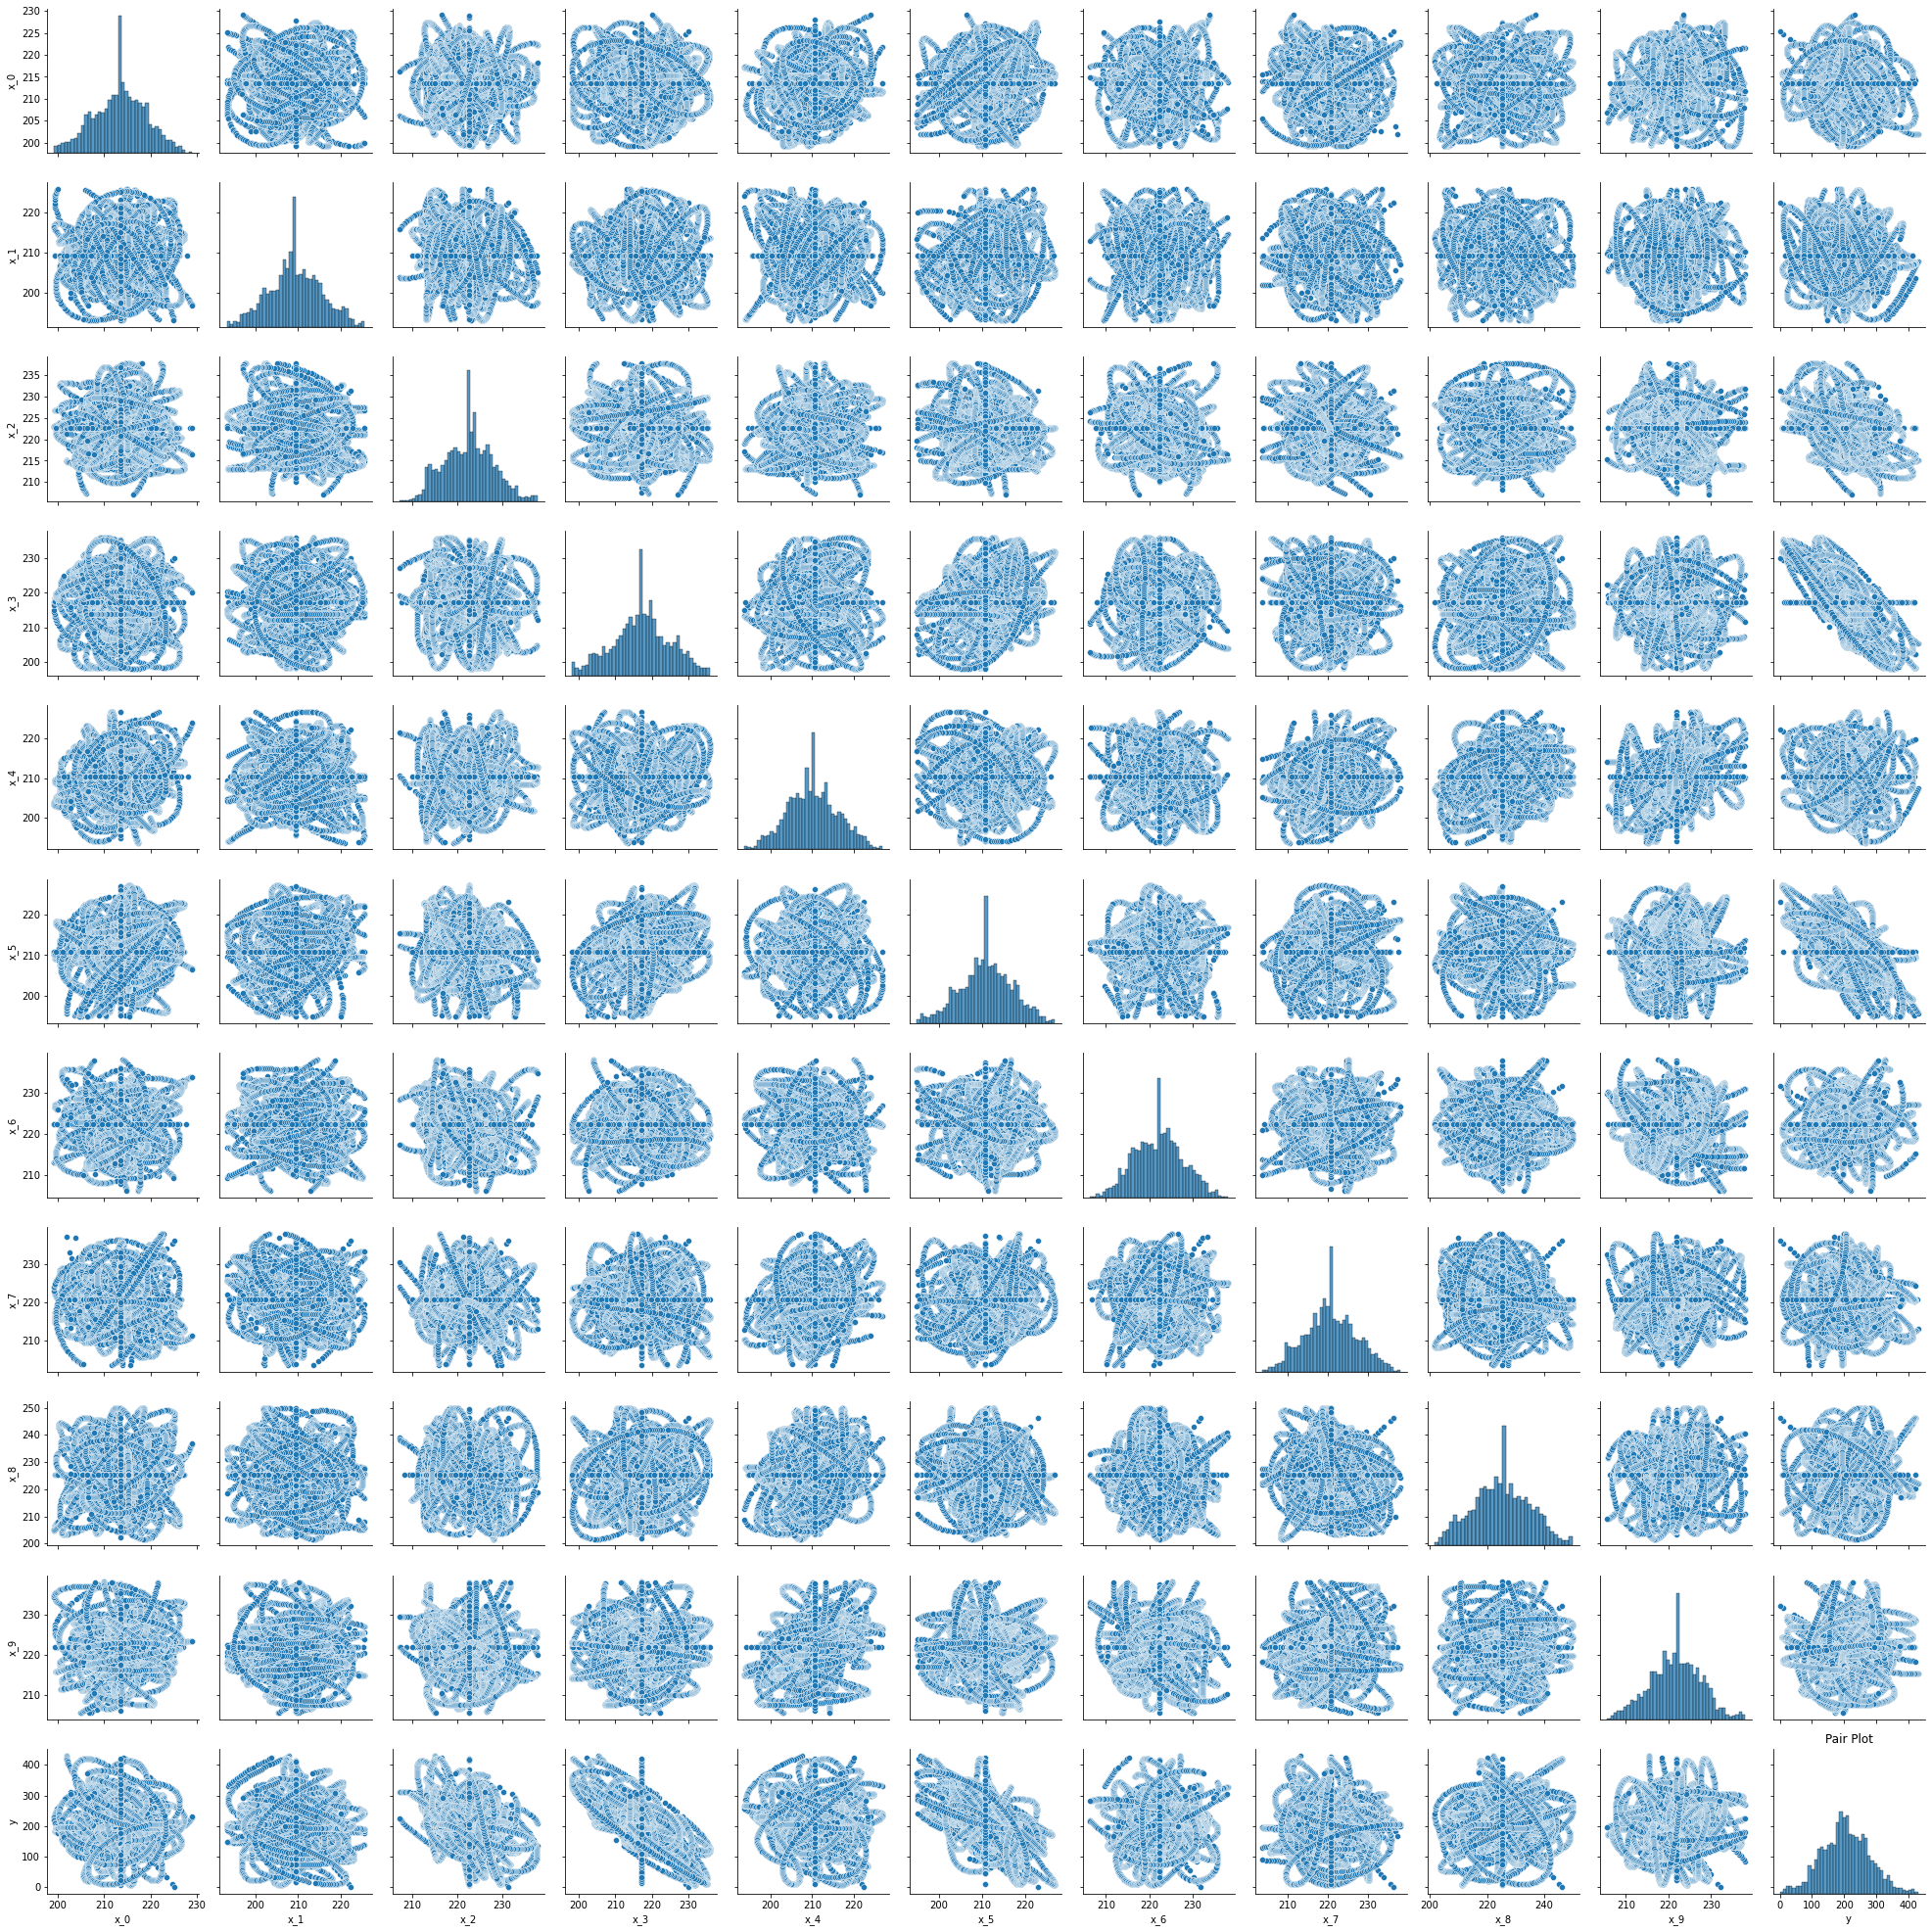

In [41]:
## Pair plot for every feature in the dataset
sns.pairplot(df_out)
plt.title('Pair Plot')
plt.tight_layout()
plt.show()

Now, we check the correlation of every x feature with y by using the scatter plot and regression plot to analyse that with the increase or decrease in the value of a particular x feature whether the value of y increasing or decreasing

Text(0, 0.5, 'y')

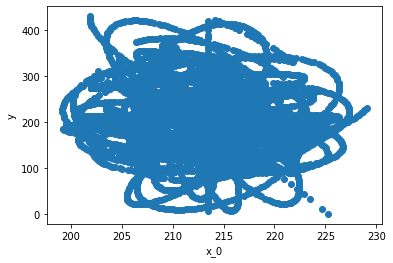

In [43]:
## Scatter plot for every x feature with y

plt.scatter(df_out['x_0'], df_out['y']) # checked the scatter plot for df_out['x_1'], df_out['x_2'], df_out['x_3'], df_out['x_4'], df_out['x_5'], df_out['x_6'], df_out['x_7'], df_out['x_8'], and df_out['x_9'] with df_out['y']
plt.xlabel("x_0")
plt.ylabel("y")

<AxesSubplot:xlabel='x_0', ylabel='y'>

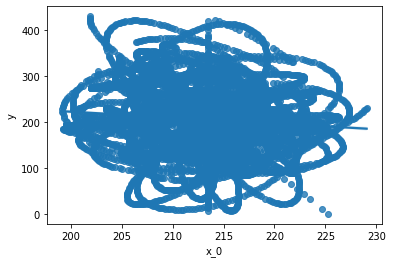

In [45]:
## Regression plot for every x feature with y

sns.regplot(x="x_0",y="y",data=df_out) # checked the regression plot for 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', and 'x_9' with 'y'


**Create Independent and Dependent features as data and labels by using dataset**

In [46]:
## Independent and Dependent features

# Create labels for the prediction 
y_labels_out = df_out['y']

# Drop y for training
x_out = df_out.drop(columns=['y'])

# **Split training data and labels**

In [47]:
from sklearn.model_selection import train_test_split
x_trainVal, x_test, y_trainVal, y_test = train_test_split(x_out, y_labels_out, test_size=0.1, shuffle=True)

In [48]:
x_train, x_val, y_train, y_val = train_test_split(x_trainVal, y_trainVal, test_size=0.2, shuffle=True)

# **Machine learning Models**



> **We are developing and training 4 models that are:**

1.   Linear Regression
2.   SVR (Support Vector Regressor)
3.   XGBoost Regressor
4.   Random Forest

Decision tree based models (here, XGBoost Regressor and Random forest) do not require feature scaling to be performed as they are not sensitive to the the variance in the data. Whereas, Linear regression and SVR need scalar standard.

> **We are evaluating our model on vaidation dataset (x_val, y_val) by using 3 performance metrics that are:**

1.   R square, R^2: R square is the Coefficient of determination.

    **Formula**

                R^2 = 1 - SSR/SST

   where:
   
   - SSR = sum of squares of residuals,
  
   - SST = total sum of squares

   R-square value ranges from 0 to 1, 1 means model performance is best and 0 means model performance is worst.

2.  Mean Absolute Percentage Error (MAPE): MAPE is used to measure the forecasting accuracy of a model.

    **Formula**
       
        MAPE = (1/n) * Σ(|actual – forecast| / |actual|) * 100

   where:

  - Σ = a fancy symbol that means “sum”
  - n = sample size
  - actual = the actual data value
  - forecast = the forecasted data value

  MAPE value ranges from 0 to infinity in percentage, where the lower the value the more accurate the predictions are, like 0% - 5% is the best value and around 10% is very good value.

3.  Accuracy: Accuracy is how close or far is the measurements of predictions or observations are to their actual values.

    **Formula**

                Accuracy = 100% - ER
                ER = |Observed Value - Actual Value|/Actual Value × 100.

   where:
   
   - ER = Error Rate,
   
   Accuracy value ranges from 0% to 100%, 100% means model performance is best and 0% means model performance is worst.

**We also calculated the intercept of the model and the parameters on which the model has been trained for Linear Regression and SVR model. Calculated  the coefficients of Linear Regression the model as coefficients are only available when using a linear kernel.**


In [49]:
"""
GridSearchCV for best hyperparameters (Commenting as this takes more that 2-3 hours)
"""
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# params = { 'max_depth': [3,6,12,15],
#            'learning_rate': [0.01, 0.05, 0.1],
#            'n_estimators': [100, 500, 1000],
#            'colsample_bytree': [0.3, 0.7]}
# xgbr = XGBRegressor(seed = 3137)
# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=1)
# clf.fit(x_train, y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

'\nGridSearchCV for best hyperparameters (Commenting as this takes more that 2-3 hours)\n'

In [50]:
def predict(model_name, x_train, y_train, x_val):
  """
  This function generates model object and predicts result on Validation dataset
  """

  if model_name == "LinearRegression":
    model = LinearRegression()
  elif model_name == "SVR":
    model = SVR(kernel='rbf') # make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
  elif model_name == "XGBRegressor":
    model = XGBRegressor(colsample_bytree = 0.7, eta = 0.35, max_depth=12, n_estimators=500, learning_rate=0.1, min_child_weight=15 , objective = 'reg:squarederror', eval_metric = 'rmse', seed = 3137)
  elif model_name == "RandomForestRegressor":
    model = RandomForestRegressor(max_depth=25, n_estimators=500, random_state=18)
  

  model = model.fit(x_train, y_train)
  pred = model.predict(x_val)
  return model, pred

def metric(y_val,pred,model_name):
  """
  This function calculates the R^2, MAPE and Accuracy of the model.
  """
  print("Model Name: ",model_name)
  print("     ")
  mape = np.mean(np.abs((y_val - pred) / np.abs(y_val)))
  r2 = r2_score(y_val, pred)
  print('coefficient of determination, R^2:', r2)
  print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
  print('Accuracy:', round(100*(1 - mape), 2))

def metric2(y_val,pred,model_name):
  """
  This function calculates the intercept and Parameters on which the model has been trained of the model. We will use this function for Linear Regression and SVR model as these models have intercepts and parameters are calculated in this way.
  """
  print(f"Intercept: {model_name.intercept_}")
  print(f"Parameters on which the model has been trained: {model_name.get_params()}")



def metric3(y_val,pred,model_name):
  """
  This function calculates the coefficients (slope) of the Linear Regression model. We will not use this function for other 3 models as they don't calculate coefficients, coefficients are only available when using a linear kernel.
  """
  print(f"Slope: {model_name.coef_}")

**Run Models**

In [51]:
# name the model to be considered
model_name = "XGBRegressor"

# run prediction for the model
XGB_model , XBG_pred = predict(model_name, x_train, y_train, x_val)

# print R^2, MAPE and accuracy
metric(y_val, XBG_pred, model_name)

Model Name:  XGBRegressor
     
coefficient of determination, R^2: 0.963747316913224
Mean Absolute Percentage Error (MAPE): 4.75
Accuracy: 95.25


In [53]:
# name the model to be considered
model_name = "RandomForestRegressor"

# run prediction for the model
RF_model , RF_pred = predict(model_name, x_train, y_train, x_val)

# print R^2, MAPE and accuracy
metric(y_val, RF_pred, model_name)

Model Name:  RandomForestRegressor
     
coefficient of determination, R^2: 0.9541847755708341
Mean Absolute Percentage Error (MAPE): 4.28
Accuracy: 95.72


**Standarize the dataset by normalizing it for Linear Regression and SVR Model**

In [57]:
## Standardize the dataset

scaler=StandardScaler()

x_train_scale=scaler.fit_transform(x_train)
x_val_scale=scaler.transform(x_val)
x_test_scale=scaler.transform(x_test)

In [58]:
pickle.dump(scaler,open('scaling.pkl','wb'))

In [59]:
# name the model to be considered
model_name = "LinearRegression"

# run prediction for the model
LR_model , LR_pred = predict(model_name, x_train_scale, y_train, x_val_scale)

# print R^2, MAPE and accuracy
metric(y_val, LR_pred, model_name)

# print the intercept of the model and the parameters on which the model has been trained
metric2(y_val, LR_pred, LR_model)

# print the coefficients of the model
metric3(y_val, LR_pred, LR_model)

Model Name:  LinearRegression
     
coefficient of determination, R^2: 0.9469307323035839
Mean Absolute Percentage Error (MAPE): 4.54
Accuracy: 95.46
Intercept: 205.19179102674607
Parameters on which the model has been trained: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
Slope: [-10.3164606    0.08267817 -34.62555435 -53.56629685   0.50563487
 -30.25571678   0.25507702  -0.30099611   9.5883094    0.22835582]


In [60]:
# name the model to be considered
model_name = "SVR"

# run prediction for the model
SVR_model , SVR_pred = predict(model_name, x_train_scale, y_train, x_val_scale)

# print R^2, MAPE and accuracy
metric(y_val, SVR_pred, model_name)

# print the intercept of the model and the parameters on which the model has been trained
metric2(y_val, SVR_pred, SVR_model)

Model Name:  SVR
     
coefficient of determination, R^2: 0.8774845103878623
Mean Absolute Percentage Error (MAPE): 15.04
Accuracy: 84.96
Intercept: [207.99601014]
Parameters on which the model has been trained: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


# **Evaluate on test data**

From the above experiments, we concluded that XGBRegressor gives best R^2 value i.e. approx. 0.97. Therefore, we will be using XGBRegressor model for testing.

> **Note**: Here, the test data is not scaled, so we are using x_test.



In [62]:
## Test prediction using XGBRegressor model

test_pred = XGB_model.predict(x_test)
test_pred = test_pred.round(decimals=5)

metric(y_test, test_pred, 'XGBRegressor')

Model Name:  XGBRegressor
     
coefficient of determination, R^2: 0.9729969961631784
Mean Absolute Percentage Error (MAPE): 4.15
Accuracy: 95.85


Text(0.5, 1.0, 'Feature Importance')

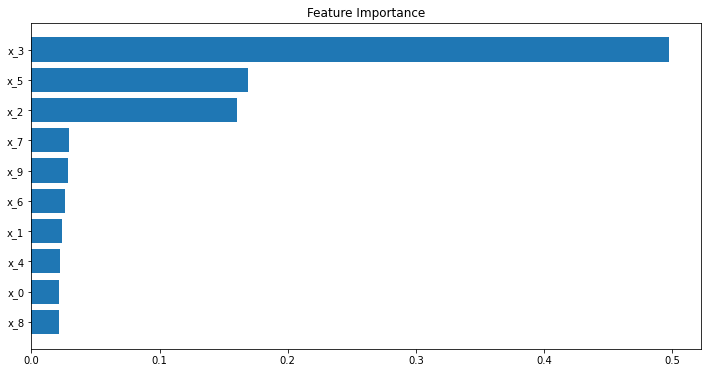

In [66]:
## Checking feature importance for XGBRegressor model

feature_importance = XGB_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')

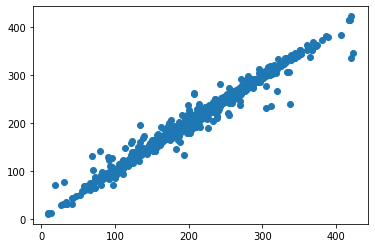

In [67]:
## plot a scatter plot for the test predictions
plt.scatter(y_test,test_pred)

- Uniformally distributed along a linear line.

In [68]:
## Residuals
residuals=y_test-test_pred
residuals

494.0    -4.956897
280.3     3.552277
65.2     -1.511413
83.7      0.132014
992.9    13.725290
           ...    
167.7    -6.841851
675.0    -9.268998
658.7    -0.308461
828.6    53.066735
698.9     6.579255
Name: y, Length: 884, dtype: float64

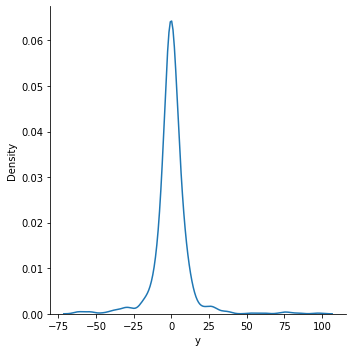

In [69]:
## Plot these residuals 

sns.displot(residuals,kind="kde")

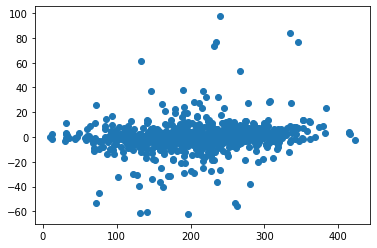

In [70]:
## Scatter plot with respect to test predictions and residuals
plt.scatter(test_pred,residuals)

- Uniform distribution

# **Pickling the Model file for the Deployment**

In [71]:
import pickle

In [72]:
pickle.dump(XGB_model,open('XGBmodel.pkl','wb'))

In [73]:
pickled_model=pickle.load(open('XGBmodel.pkl','rb'))